In [1]:
import pandas as pd
from sklearn import linear_model as lm
from sklearn.feature_selection import RFE
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(os.getcwd())
os.chdir('D:\Data science  notes')

C:\Users\hp\Python2


In [4]:
#read the carPrice
df=pd.read_csv('carPrice.csv')
df.head()

,car_ID,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.columns.values

array(['car_ID', 'symboling', 'carCompany', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'], dtype=object)

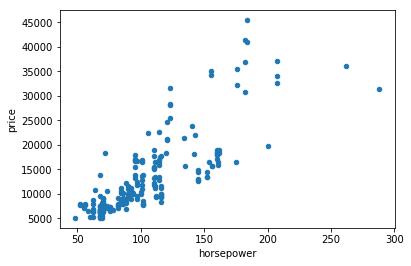

In [14]:
df.plot(x='horsepower', y='price', kind='scatter')
plt.show()

In [15]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [18]:
#create dummy variables for the column
dummy_cols = """carCompany fueltype aspiration doornumber carbody 
drivewheel enginelocation enginetype 
cylindernumber fuelsystem""".split()

dummies=pd.get_dummies(df[dummy_cols])

In [20]:
dummies.columns.values

array(['carCompany_alfa-romero', 'carCompany_audi', 'carCompany_bmw',
       'carCompany_chevrolet', 'carCompany_dodge', 'carCompany_honda',
       'carCompany_isuzu', 'carCompany_jaguar', 'carCompany_mazda',
       'carCompany_mercedes-benz', 'carCompany_mercury',
       'carCompany_mitsubishi', 'carCompany_nissan', 'carCompany_peugot',
       'carCompany_plymouth', 'carCompany_porsche', 'carCompany_renault',
       'carCompany_saab', 'carCompany_subaru', 'carCompany_toyota',
       'carCompany_volkswagen', 'carCompany_volvo', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv'

In [21]:
#drop the original column
df=df.drop(dummy_cols,axis=1)

In [22]:
df.columns.values

array(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'], dtype=object)

In [23]:
df=df.join(dummies)

In [24]:
df.columns.values

array(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'carCompany_alfa-romero', 'carCompany_audi',
       'carCompany_bmw', 'carCompany_chevrolet', 'carCompany_dodge',
       'carCompany_honda', 'carCompany_isuzu', 'carCompany_jaguar',
       'carCompany_mazda', 'carCompany_mercedes-benz',
       'carCompany_mercury', 'carCompany_mitsubishi', 'carCompany_nissan',
       'carCompany_peugot', 'carCompany_plymouth', 'carCompany_porsche',
       'carCompany_renault', 'carCompany_saab', 'carCompany_subaru',
       'carCompany_toyota', 'carCompany_volkswagen', 'carCompany_volvo',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drive

In [29]:
#Break Data Up Into Training And Test Datasets

# Create our predictor/independent variable
# and our response/dependent variable

x=df.drop(['price','car_ID'],axis=1)
y=df['price']

col=x.columns.values

In [34]:
##Normalize the data
from sklearn import preprocessing
std_scale=preprocessing.StandardScaler().fit(x)
x_std=std_scale.transform(x)
x=pd.DataFrame(x_std,columns=col)

In [35]:
x.columns.values

array(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'carCompany_alfa-romero', 'carCompany_audi',
       'carCompany_bmw', 'carCompany_chevrolet', 'carCompany_dodge',
       'carCompany_honda', 'carCompany_isuzu', 'carCompany_jaguar',
       'carCompany_mazda', 'carCompany_mercedes-benz',
       'carCompany_mercury', 'carCompany_mitsubishi', 'carCompany_nissan',
       'carCompany_peugot', 'carCompany_plymouth', 'carCompany_porsche',
       'carCompany_renault', 'carCompany_saab', 'carCompany_subaru',
       'carCompany_toyota', 'carCompany_volkswagen', 'carCompany_volvo',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       

In [36]:
x.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014


In [38]:
#Correlation Matrix
corr=x.corr()
print(corr)

                          symboling  wheelbase  carlength  carwidth  \
symboling                  1.000000  -0.531954  -0.357612 -0.232919   
wheelbase                 -0.531954   1.000000   0.874587  0.795144   
carlength                 -0.357612   0.874587   1.000000  0.841118   
carwidth                  -0.232919   0.795144   0.841118  1.000000   
carheight                 -0.541038   0.589435   0.491029  0.279210   
curbweight                -0.227691   0.776386   0.877728  0.867032   
enginesize                -0.105790   0.569329   0.683360  0.735433   
boreratio                 -0.130051   0.488750   0.606454  0.559150   
stroke                    -0.008735   0.160959   0.129533  0.182942   
compressionratio          -0.178515   0.249786   0.158414  0.181129   
horsepower                 0.070873   0.353294   0.552623  0.640732   
peakrpm                    0.273606  -0.360469  -0.287242 -0.220012   
citympg                   -0.035823  -0.470414  -0.670909 -0.642704   
highwa

In [39]:
# Create our test data from the first 150 observations
x_train = x[0:150]
y_train = y[0:150]

# Create our training data from the remaining observations
x_test = x[150:]# Create an object that is an ols regression
y_test = y[150:]

In [40]:
x_test.columns.values

array(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'carCompany_alfa-romero', 'carCompany_audi',
       'carCompany_bmw', 'carCompany_chevrolet', 'carCompany_dodge',
       'carCompany_honda', 'carCompany_isuzu', 'carCompany_jaguar',
       'carCompany_mazda', 'carCompany_mercedes-benz',
       'carCompany_mercury', 'carCompany_mitsubishi', 'carCompany_nissan',
       'carCompany_peugot', 'carCompany_plymouth', 'carCompany_porsche',
       'carCompany_renault', 'carCompany_saab', 'carCompany_subaru',
       'carCompany_toyota', 'carCompany_volkswagen', 'carCompany_volvo',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       

In [41]:
# Create an object that is an ols regression
ols = lm.LinearRegression()

In [42]:
# Train the model using our training data
model = ols.fit(x_train, y_train)

In [44]:
model.intercept_

2973324423069790.0

In [45]:
# View the training model's coefficient
model.coef_

array([  2.46679194e+02,   1.20931763e+03,  -1.26380504e+03,
         6.05977981e+02,  -6.69284969e+00,   4.50667212e+03,
         3.65047010e+03,  -1.08079490e+03,  -3.98539843e+01,
         5.33599416e+03,   1.92754857e+03,   1.67071280e+03,
         9.03828439e+01,   1.42595538e+03,  -1.30742378e+15,
        -1.97725045e+15,  -2.10842509e+15,  -1.30742378e+15,
        -2.23063935e+15,  -2.65339776e+15,  -1.50594147e+15,
        -1.30742378e+15,  -3.00250303e+15,  -2.10842509e+15,
        -7.58569107e+14,  -2.65339776e+15,  -3.08132228e+15,
        -6.59561222e+15,  -1.97725045e+15,  -1.67950023e+15,
        -1.07014613e+15,  -1.83519506e+15,   4.88654177e+15,
         1.29697838e+14,   1.98064692e+13,  -3.55723419e+13,
         1.15257203e+15,   1.29382011e+15,   1.20595755e+15,
         1.20595755e+15,   6.76048632e+14,   6.76048632e+14,
         1.34013626e+15,   1.53966027e+15,   3.77018534e+15,
         3.96730565e+15,   2.60167505e+15,  -1.85328122e+15,
        -4.45648162e+15,